<a href="https://colab.research.google.com/github/hamza2803/Marketing-Campaign-EDA/blob/main/Marketing_Campaign_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
marketing_campaign_data = '/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [ ]:
len(marketing_campaign_dataframe)

2240

In [ ]:
marketing_campaign_dataframe.head()

In [ ]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

In [ ]:
marketing_campaign_dataframe['Total spent'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe:
                           marketing_campaign_dataframe['MntWines'] + marketing_campaign_dataframe['MntFruits'] +
                           marketing_campaign_dataframe['MntMeatProducts'] + marketing_campaign_dataframe['MntFishProducts'] +
                           marketing_campaign_dataframe['MntSweetProducts'] + marketing_campaign_dataframe['MntGoldProds'], axis=1)

marketing_campaign_dataframe['Total accept cmp'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe:
                           marketing_campaign_dataframe['AcceptedCmp1'] + marketing_campaign_dataframe['AcceptedCmp2'] +
                           marketing_campaign_dataframe['AcceptedCmp3'] + marketing_campaign_dataframe['AcceptedCmp4'] +
                           marketing_campaign_dataframe['AcceptedCmp5'], axis=1)

marketing_campaign_dataframe['Total purchases'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe:
                           marketing_campaign_dataframe['NumDealsPurchases'] + marketing_campaign_dataframe['NumWebPurchases'] +
                           marketing_campaign_dataframe['NumCatalogPurchases'] + marketing_campaign_dataframe['NumStorePurchases'], axis=1)

In [ ]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total spent,Total accept cmp,Total purchases
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,0,25
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,6
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,21
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,8
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,19


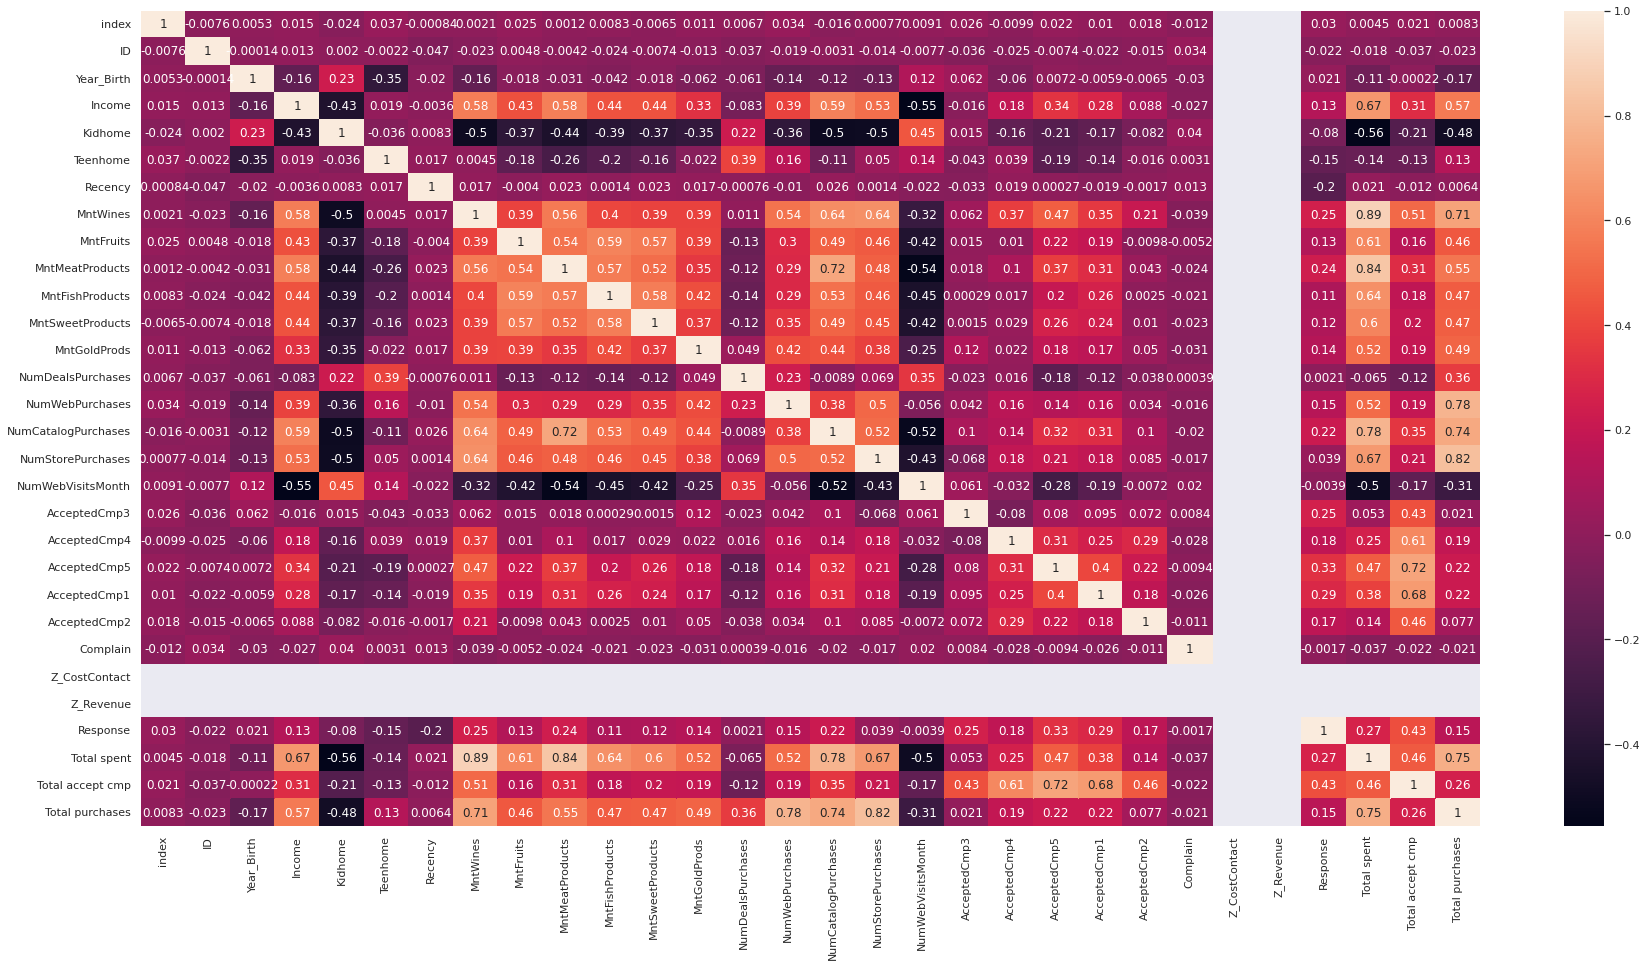

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(30, 15))
sns.heatmap(marketing_campaign_dataframe.corr(), annot=True)

plt.show()

In [ ]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['ID', 'Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain',
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases']].copy()

X.columns = ['Customer identification', 'Education', 'Marital Status', 'Customer annual income',
             'Children at home', 'Teenagers at home', 'Recency', 'Customer complaints',
             'spent on wine', 'spent on fruits', 'spent on meat', 'spent on fish',
             'spent on candy', 'spent products in gold', 'purchases made at a discount',
             'purchases made by the site', 'purchases made by the catalog',
             'purchases made in the physical store', 'visits to the site monthly',
             'Offer accepted in third campaign', 'Offer accepted in fourth campaign',
             'Offer accepted in the fifth campaign', 'Offer accepted in the first campaign',
             'Offer accepted in the second campaign', 'Complaints', 'Customer response to the campaign',
             'Total spent', 'Total accepted during the campaign', 'Total purchases']

X.head()

,Customer identification,Education,Marital Status,Customer annual income,Children at home,Teenagers at home,Recency,Customer complaints,spent on wine,spent on fruits,spent on meat,spent on fish,spent on candy,spent products in gold,purchases made at a discount,purchases made by the site,purchases made by the catalog,purchases made in the physical store,visits to the site monthly,Offer accepted in third campaign,Offer accepted in fourth campaign,Offer accepted in the fifth campaign,Offer accepted in the first campaign,Offer accepted in the second campaign,Complaints,Customer response to the campaign,Total spent,Total accepted during the campaign,Total purchases
0,5524,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25
1,2174,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6
2,4141,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21
3,6182,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8
4,5324,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19


In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Education', 'Marital Status'])
X.columns = ['Customer ID', 'Customer Annual Income', 'Qnt. Children at home', 'Qnt. Teenagers at home',
             'Recency', 'Customer Complaints', 'spent on wine', 'spent on fruits',
             'spent on meat', 'spent on fish', 'spent on candy',
             'spent products in gold', 'purchases made at a discount',
             'purchases made by the site','purchases made by the catalog',
             'purchases made in the physical store', 'visits to the site monthly',
             'Offer accepted in third campaign', 'Offer accepted in fourth campaign',
             'Offer accepted in the fifth campaign', 'Offer accepted in the first campaign',
             'Offer accepted in the second campaign', 'Complaints', 'Customer response to the campaign',
             'Total spent', 'Total accepted during the campaign', 'Total purchases',
             'Doctor', 'High School', 'Higher Education', 'Master', 'PhD',
             'Absurd Marital Status', 'Alone Marital Status', 'Divorced Marital Status',
             'Married Marital Status', 'Single Marital Status', 'Married Marital Status',
             'Widowed Marital Status', 'Detached Marital Status']

X.head()

,Customer ID,Customer Annual Income,Qnt. Children at home,Qnt. Teenagers at home,Recency,Customer Complaints,spent on wine,spent on fruits,spent on meat,spent on fish,spent on candy,spent products in gold,purchases made at a discount,purchases made by the site,purchases made by the catalog,purchases made in the physical store,visits to the site monthly,Offer accepted in third campaign,Offer accepted in fourth campaign,Offer accepted in the fifth campaign,Offer accepted in the first campaign,Offer accepted in the second campaign,Complaints,Customer response to the campaign,Total spent,Total accepted during the campaign,Total purchases,Doctor,High School,Higher Education,Master,PhD,Absurd Marital Status,Alone Marital Status,Divorced Marital Status,Married Marital Status,Single Marital Status,Married Marital Status,Widowed Marital Status,Detached Marital Status
0,5524,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
for content in X:
    X.dropna(subset=[content], inplace=True)

#Comparison between Total Amount Spent and individual Items


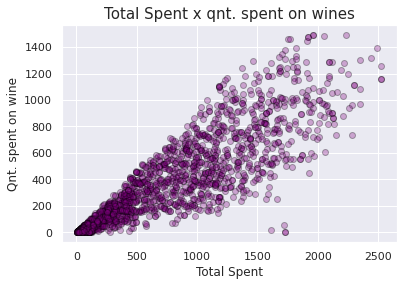

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['Total spent'], X['spent on wine'], alpha=0.3, color='purple',
            edgecolors='black')

plt.title('Total Spent x qnt. spent on wines', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on wine', fontsize=12)

plt.show()

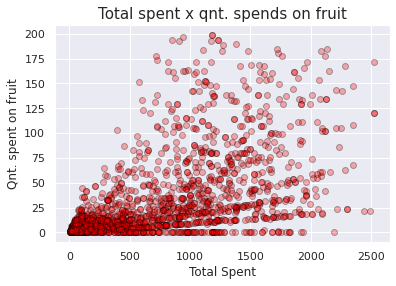

In [ ]:
plt.scatter(X['Total spent'], X['spent on fruits'], alpha=0.3, color='red',
            edgecolors='black')

plt.title('Total spent x qnt. spends on fruit', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on fruit', fontsize=12)

plt.show()

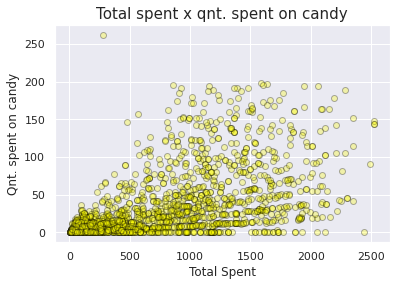

In [ ]:
plt.scatter(X['Total spent'], X['spent on candy'], alpha=0.3, color='yellow',
            edgecolors='black')

plt.title('Total spent x qnt. spent on candy', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on candy', fontsize=12)

plt.show()

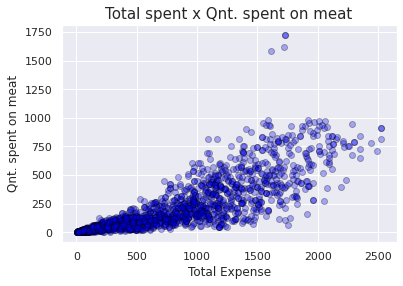

In [ ]:
plt.scatter(X['Total spent'], X['spent on meat'], alpha=0.3, color='blue',
            edgecolors='black')

plt.title('Total spent x Qnt. spent on meat', fontsize=15)
plt.xlabel('Total Expense', fontsize=12)
plt.ylabel('Qnt. spent on meat', fontsize=12)

plt.show()

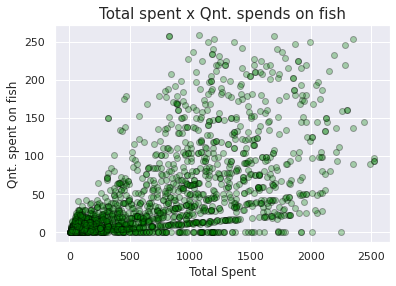

In [ ]:
plt.scatter(X['Total spent'], X['spent on fish'], alpha=0.3, color='green',
            edgecolors='black')

plt.title('Total spent x Qnt. spends on fish', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on fish', fontsize=12)

plt.show()

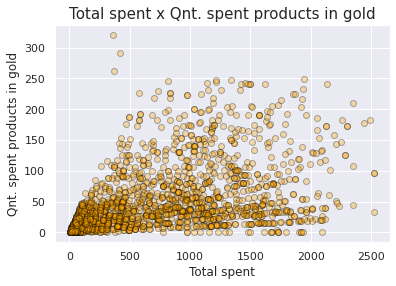

In [ ]:
plt.scatter(X['Total spent'], X['spent products in gold'], alpha=0.3, color='orange',
            edgecolors='black')

plt.title('Total spent x Qnt. spent products in gold', fontsize=15)
plt.xlabel('Total spent', fontsize=12)
plt.ylabel('Qnt. spent products in gold', fontsize=12)

plt.show()

#Comparision Between Customer Annual Income and money spent on individual Items


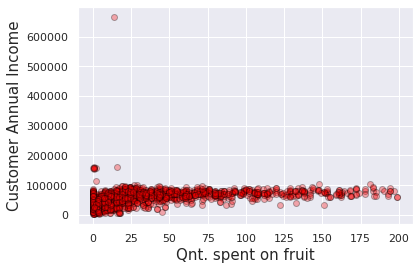

In [ ]:
plt.scatter(X['spent on fruits'], X['Customer Annual Income'], alpha=0.3,
            color='red', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on fruit', fontsize=15)
plt.show()

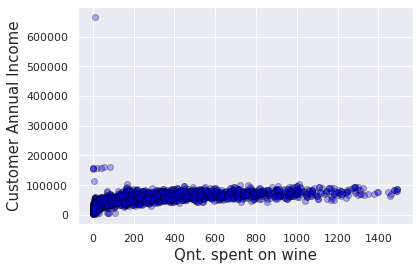

In [ ]:
plt.scatter(X['spent on wine'], X['Customer Annual Income'], alpha=0.3,
            color='blue', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on wine', fontsize=15)
plt.show()

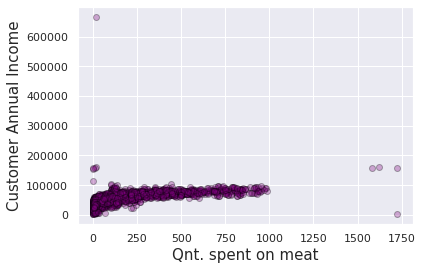

In [ ]:
plt.scatter(X['spent on meat'], X['Customer Annual Income'], alpha=0.3,
            color='purple', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on meat', fontsize=15)
plt.show()

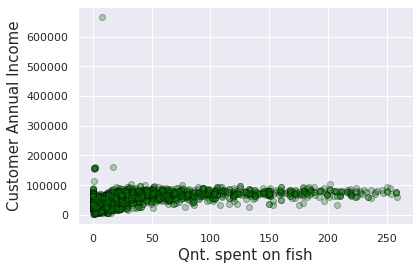

In [ ]:
plt.scatter(X['spent on fish'], X['Customer Annual Income'], alpha=0.3,
            color='green', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on fish', fontsize=15)
plt.show()

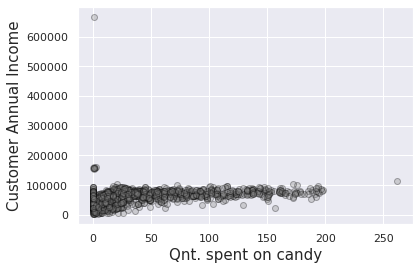

In [ ]:
plt.scatter(X['spent on candy'], X['Customer Annual Income'], alpha=0.3,
            color='gray', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on candy', fontsize=15)
plt.show()

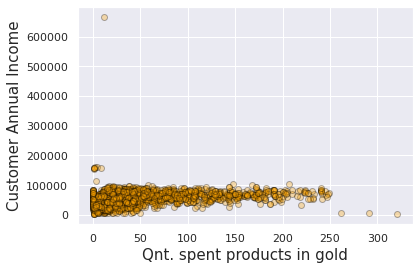

In [ ]:
plt.scatter(X['spent products in gold'], X['Customer Annual Income'], alpha=0.3,
            color='orange', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent products in gold', fontsize=15)
plt.show()

# Linear Analysis of Customer Annual Income and Money spent on individual items


In [ ]:
linear_analysis_axisX = X[['spent on wine', 'spent on meat', 'spent on candy',
                           'spent on fish', 'spent on fruits', 'spent products in gold']]

linear_analysis_axisY = X[['Customer Annual Income']]

In [ ]:
from sklearn.model_selection import train_test_split

linear_Xtrain, linear_Xtest, linear_ytrain, linear_ytest = train_test_split(
    linear_analysis_axisX, linear_analysis_axisY, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(linear_Xtrain, linear_ytrain)

In [ ]:
linear_pred = linear_model.predict(linear_Xtest)

In [ ]:
from sklearn.metrics import r2_score

print('coefficient of determination: ', r2_score(linear_ytest, linear_pred))

coefficient of determination:  0.6767215200850755


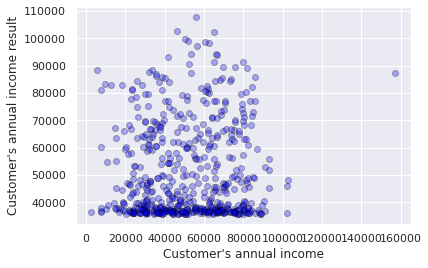

In [ ]:
plt.scatter(linear_analysis_axisY.iloc[0:554, :], linear_pred, alpha=0.3, color='blue',
            edgecolors='black')

plt.xlabel('Customer\'s annual income', fontsize=12)
plt.ylabel('Customer\'s annual income result', fontsize=12)

plt.show()

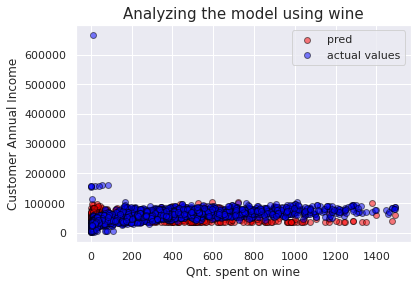

In [ ]:
plt.scatter(linear_analysis_axisX.iloc[0:554, [0]], linear_pred, alpha=0.5,
            color='red', edgecolors='black', label='pred')

plt.scatter(X['spent on wine'], X['Customer Annual Income'], alpha=0.5,
            color='blue', edgecolors='black', label='actual values')

plt.title('Analyzing the model using wine', fontsize=15)
plt.xlabel('Qnt. spent on wine', fontsize=12)
plt.ylabel('Customer Annual Income', fontsize=12)

plt.legend()
plt.show()

#Training ANN to predict Customer response to campaign

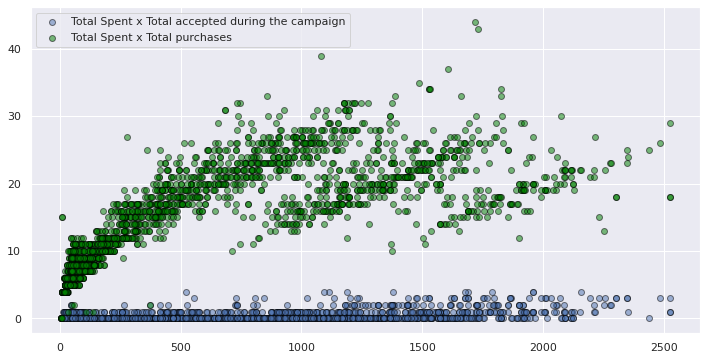

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(X['Total spent'], X['Total accepted during the campaign'], alpha=0.5,
            edgecolors='black',  label='Total Spent x Total accepted during the campaign')

plt.scatter(X['Total spent'], X['Total purchases'], alpha=0.5, color='green',
            edgecolors='black',  label='Total Spent x Total purchases')

plt.legend()
plt.show()

In [ ]:
deep_learning_X = X[['Complaints', 'Total spent', 'Total accepted during the campaign',
                     'Total purchases']]

deep_learning_y = X[['Customer response to the campaign']]

In [ ]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X, deep_learning_y, test_size=0.25, shuffle=True
)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.7971
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8621
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8603
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8609
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8627
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8627
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8627
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8627
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8639
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3580 - accura

In [ ]:
print(ann.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[[False]]


In [ ]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [ ]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1),
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[466   8]
 [ 65  15]]
accuracy score for confusion matrix:  0.868231046931408


#Training ANN to predict Customer response to campaign wrt degree of customer

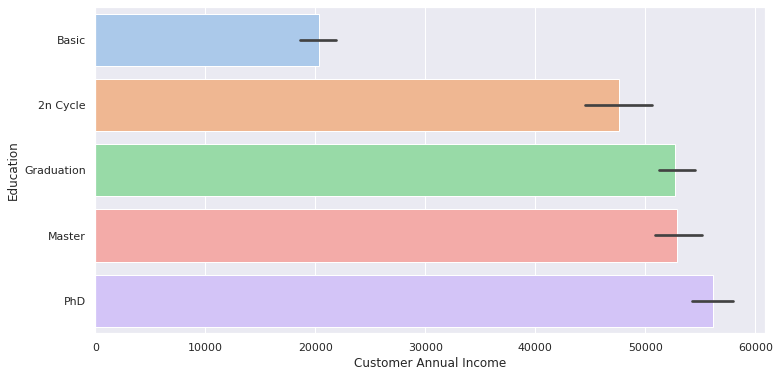

In [ ]:
display_elements = marketing_campaign_dataframe[['Income', 'Education']]
display_elements.columns = ['Customer Annual Income', 'Education']

import seaborn as sns

plt.figure(figsize=(12, 6))

sns.set()
sns.barplot(x=display_elements['Customer Annual Income'],
            y=display_elements['Education'],
            palette='pastel', order=['Basic', '2n Cycle', 'Graduation', 'Master',
                                     'PhD'])

plt.show()

In [ ]:
deep_learning_X_wDegree = X[['Complaints', 'Total spent', 'Total accepted during the campaign',
                     'Total purchases', 'Doctor', 'High School', 'Higher Education',
                     'Master', 'PhD']]

deep_learning_y_wDegree = X[['Customer response to the campaign']]

In [ ]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X_wDegree, deep_learning_y_wDegree, test_size=0.25, shuffle=True
)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 0.6845 - accuracy: 0.8110
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.8453
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8459
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8453
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8555
Epoch 6/100
139/139 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8597
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8585
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8603
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8621
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3609 - accura

In [ ]:
print(ann.predict(sc.transform([[2, 2500, 1, 5, 0, 1, 0, 0, 0]])) > 0.5)

[[False]]


In [ ]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1),
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[461  17]
 [ 58  18]]
accuracy score for confusion matrix:  0.8646209386281588


#Implementing KNN Classifier

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

wcss = []

for number_of_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    kmeans_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans_labels)
    print('For numer_of_clusters = ', number_of_clusters,
          'Silhouette score is = ', silhouette)

    colors = cm.nipy_spectral(kmeans_labels / number_of_clusters)

For numer_of_clusters =  2 Silhouette score is =  0.5721124451379548
For numer_of_clusters =  3 Silhouette score is =  0.5763125517857092
For numer_of_clusters =  4 Silhouette score is =  0.48986024554348195
For numer_of_clusters =  5 Silhouette score is =  0.45799329277945133
For numer_of_clusters =  6 Silhouette score is =  0.46252628579409116
For numer_of_clusters =  7 Silhouette score is =  0.43904350907119777
For numer_of_clusters =  8 Silhouette score is =  0.40238997011994615
For numer_of_clusters =  9 Silhouette score is =  0.3786460666499623
For numer_of_clusters =  10 Silhouette score is =  0.37226353063113143
For numer_of_clusters =  11 Silhouette score is =  0.35059112791148933


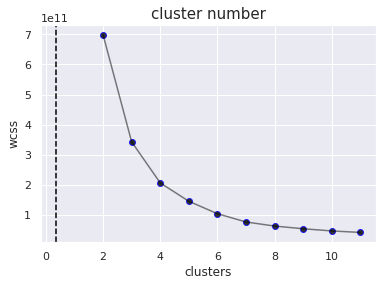

In [ ]:
plt.plot(range(2, 12), wcss[0:12], alpha=0.5, color='black')
plt.scatter(range(2, 12), wcss[0:12], alpha=0.8, color='black', edgecolors='blue')
plt.axvline(silhouette, color='black', linestyle='--')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

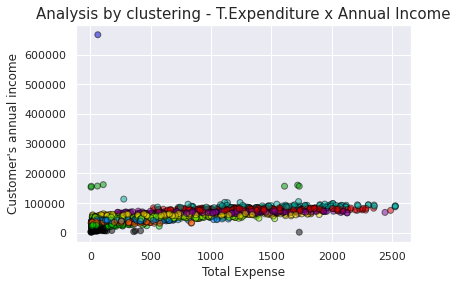

In [ ]:
plt.scatter(X['Total spent'], X['Customer Annual Income'],
            c=colors, alpha=0.5, edgecolors='black')

plt.title('Analysis by clustering - T.Expenditure x Annual Income', fontsize=15)
plt.xlabel('Total Expense', fontsize=12)
plt.ylabel('Customer\'s annual income', fontsize=12)

plt.show()

In [ ]:
X = marketing_campaign_dataframe[['Complain', 'Total spent', 'Total accept cmp',
                                  'Total purchases']]

y = marketing_campaign_dataframe[['Response']]

In [ ]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [ ]:
for content in y:
    y.dropna(subset=[content], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True,
                                                    random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.8267857142857142


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.80357143 0.79464286 0.80357143 0.80357143 0.82142857 0.83035714
 0.84821429 0.83035714 0.83035714 0.84684685]


In [ ]:
print(knn.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]
